In [35]:
# 24년 12월 3일
# commit 한 사람: 이성은
# QQplot IQR 범위로 확인, 60~80 확인, 65~75 확인

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_train = pd.read_csv("FIFA_train.csv")
df_test = pd.read_csv("FIFA_test.csv")

# 데이터 합치기
df = pd.concat([df_train, df_test], ignore_index=True)

In [2]:
left_foot = df[df["prefer_foot"] == "left"]
right_foot = df[df["prefer_foot"] == "right"]

In [5]:
right_footed_values = right_foot['stat_overall']
left_footed_values = left_foot['stat_overall']

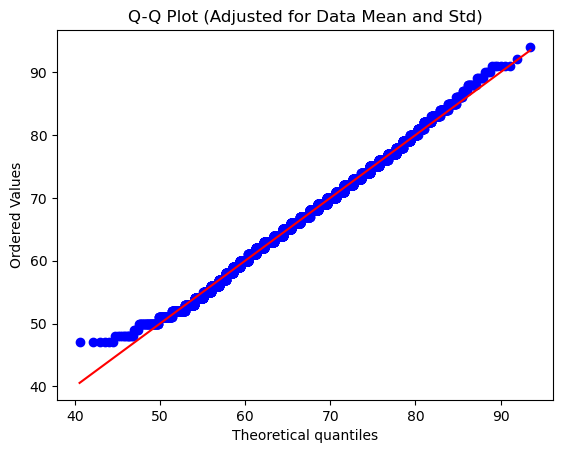

In [6]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 데이터의 평균과 표준편차 계산
mean = np.mean(right_footed_values)
std = np.std(right_footed_values)

# Q-Q Plot 생성
stats.probplot(right_footed_values, dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

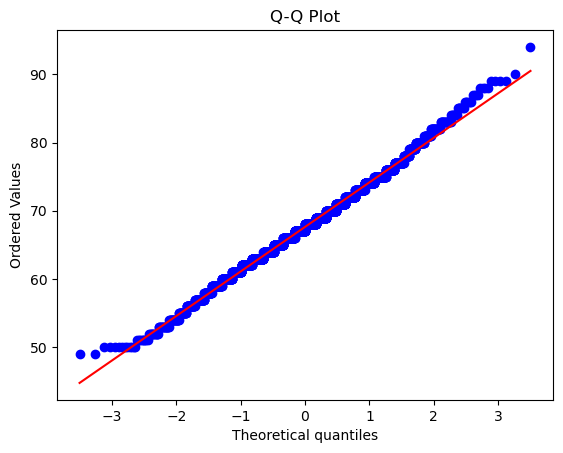

In [7]:
stats.probplot(left_footed_values, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [9]:
# 오른발 플레이어 IQR 계산 및 필터링
right_footed_values = right_foot['stat_overall']
q1_right = np.percentile(right_footed_values, 25)
q3_right = np.percentile(right_footed_values, 75)
iqr_right = q3_right - q1_right
right_footed_iqr = right_footed_values[(right_footed_values >= q1_right) & (right_footed_values <= q3_right)]

# 왼발 플레이어 IQR 계산 및 필터링
left_footed_values = left_foot['stat_overall']
q1_left = np.percentile(left_footed_values, 25)
q3_left = np.percentile(left_footed_values, 75)
iqr_left = q3_left - q1_left
left_footed_iqr = left_footed_values[(left_footed_values >= q1_left) & (left_footed_values <= q3_left)]

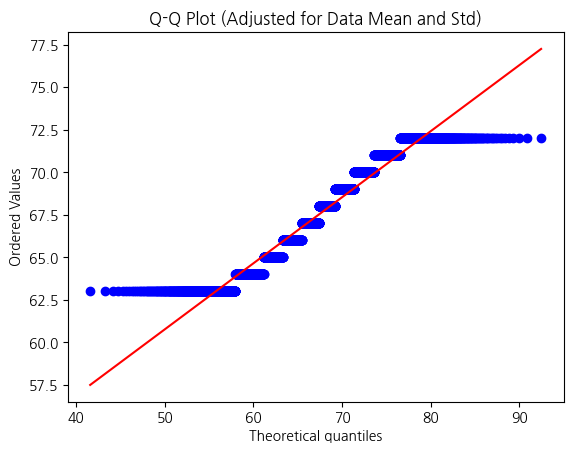

In [13]:
# 오른발 플레이어 QQ Plot
stats.probplot(right_footed_iqr, dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

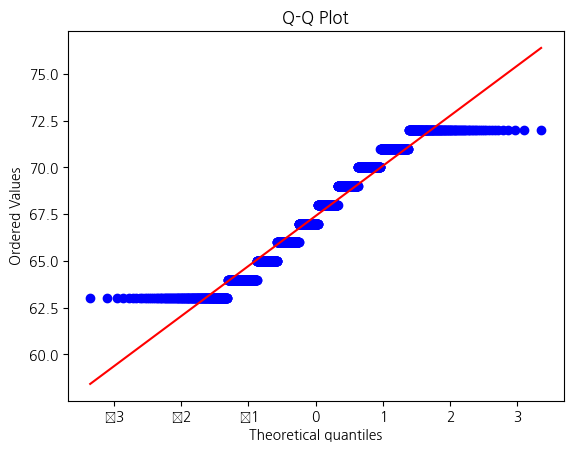

In [12]:
# 왼발 플레이어 QQ Plot
stats.probplot(left_footed_iqr, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()

In [28]:
# 오른발 플레이어 IQR 계산 및 필터링
filter_right_footed_values = right_foot[(right_foot['stat_overall'] > 60) & (right_foot['stat_overall'] < 80)]

# 왼발 플레이어 IQR 계산 및 필터링
filter_left_footed_values = left_foot[(left_foot['stat_overall'] > 60) & (left_foot['stat_overall'] < 80)]

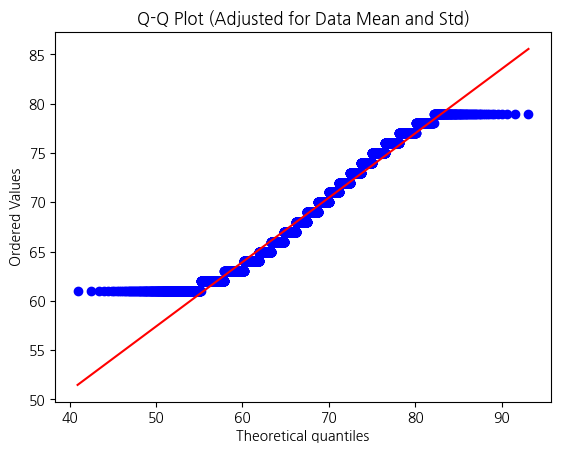

In [29]:
# 오른발 플레이어 QQ Plot
stats.probplot(filter_right_footed_values['stat_overall'], dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

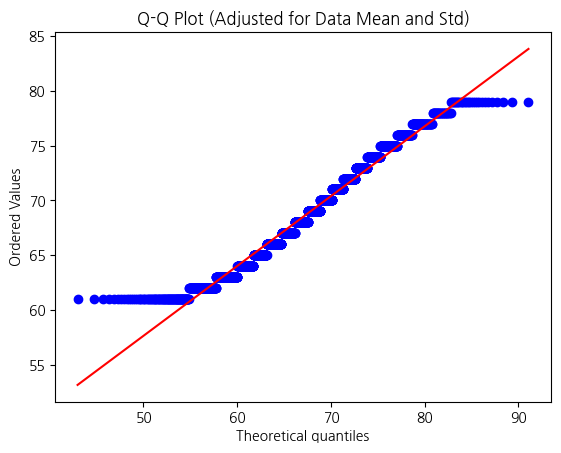

In [30]:
# 왼발 플레이어 QQ Plot
stats.probplot(filter_left_footed_values['stat_overall'], dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

In [32]:
# 오른발 플레이어 IQR 계산 및 필터링
filter_right_footed_values2 = right_foot[(right_foot['stat_overall'] > 65) & (right_foot['stat_overall'] < 75)]

# 왼발 플레이어 IQR 계산 및 필터링
filter_left_footed_values2 = left_foot[(left_foot['stat_overall'] > 65) & (left_foot['stat_overall'] < 75)]

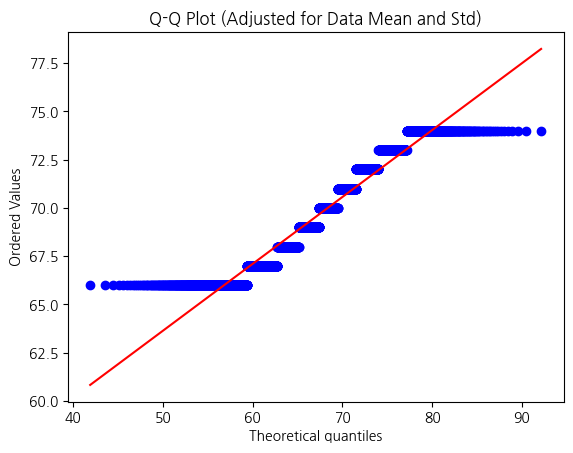

In [33]:
# 오른발 플레이어 QQ Plot
stats.probplot(filter_right_footed_values2['stat_overall'], dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

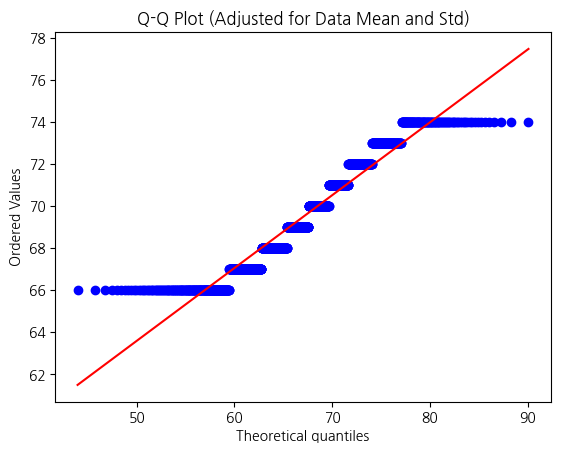

In [34]:
# 왼발 플레이어 QQ Plot
stats.probplot(filter_left_footed_values2['stat_overall'], dist="norm", sparams=(mean, std), plot=plt)
plt.title("Q-Q Plot (Adjusted for Data Mean and Std)")
plt.show()

# 데이터가 많아서 중간지역은 정규분포처럼 보였지만 확대해보니 정규분포가 아닌거 같다.